# Julia and structural geology 
Started 2019-07-05

This is a notebook for starting investigating the Julia tools applicable for structural geology and field mapping processings.

To start with, we consider the sources listing packages of interest for structural geology and field mapping.
Available sites are:
- Julia Observer: https://juliaobserver.com/packages
- JuliaGeo: https://github.com/JuliaGeo

## GDAL

We first consider the GDAL package, available at https://github.com/JuliaGeo/GDAL.jl


GDAL allows to process georeferenced raster and vectorial datasets.

It can be added with the following commands:

In [61]:
using Pkg
Pkg.add("GDAL")
Pkg.test("GDAL")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
   Testing GDAL
    Status `/tmp/tmp6tYWdv/Manifest.toml`
  [b99e7846] BinaryProvider v0.5.6
  [add2ef01] GDAL v0.2.0
  [2a0f44e3] Base64  [`@stdlib/Base64`]
  [8ba89e20] Distributed  [`@stdlib/Distributed`]
  [b77e0a4c] InteractiveUtils  [`@stdlib/InteractiveUtils`]
  [8f399da3] Libdl  [`@stdlib/Libdl`]
  [56ddb016] Logging  [`@stdlib/Logging`]
  [d6f4376e] Markdown  [`@stdlib/Markdown`]
  [9a3f8284] Random  [`@stdlib/Random`]
  [ea8e919c] SHA  [`@stdlib/SHA`]
  [9e88b42a] Serialization  [`@stdlib/Serialization`]
  [6462fe0b] Sockets  [`@stdlib/Sockets`]
  [8dfed614] Test  [`@stdlib/Test`]


┌ Info: GDAL 2.2.4, released 2018/03/19
│ 159 GDAL drivers found
└ 46 OGR drivers found


   Testing GDAL tests passed 


CPLDestroyMutex: Error = 16 (Dispositivo o risorsa occupata)


In [62]:
using GDAL

We use a DEM of the Mt. Alpi (Southern Apennines, Italy) for the tests.

In [63]:
src_geotif = joinpath(@__DIR__, "example_data/mt_alpi/mtAlpi_aster.tif")

"/home/mauro/Documenti/projects/jeo/example_data/mt_alpi/mtAlpi_aster.tif"

Since the package internal GDAL path does not result correctly defined, the path to the gdalinfo executable is explicitely defined.

In [64]:
gdalinfo_path = "/usr/bin/gdalinfo"

"/usr/bin/gdalinfo"

In [65]:
run(`$(gdalinfo_path) $(src_geotif)`)

Driver: GTiff/GeoTIFF
Files: /home/mauro/Documenti/projects/jeo/example_data/mt_alpi/mtAlpi_aster.tif
Size is 213, 260
Coordinate System is:
PROJCS["WGS 84 / UTM zone 33N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",15],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32633"]]
Origin = (580814.582700000028126,4444299.458399999886751)
Pixel Size = (27.275953521126741,-

Process(`/usr/bin/gdalinfo /home/mauro/Documenti/projects/jeo/example_data/mt_alpi/mtAlpi_aster.tif`, ProcessExited(0))

Modified from https://github.com/JuliaGeo/GDAL.jl/blob/master/test/tutorial_raster.jl

In [66]:
GDAL.allregister()

In [67]:
dataset = GDAL.open(src_geotif, GDAL.GA_ReadOnly)

Ptr{GDAL.GDALDatasetH} @0x0000000003758ef0

In [68]:
band = GDAL.getrasterband(dataset, 1)

Ptr{GDAL.GDALRasterBandH} @0x000000000590c810

In [69]:
xsize = GDAL.getrasterbandxsize(band)

213

In [70]:
ysize = GDAL.getrasterbandysize(band)

260

In [71]:
data = fill(0.0f0, (xsize, ysize))

213×260 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [72]:
GDAL.rasterio(band, GDAL.GF_Read, 0, 0, xsize, ysize,
data, xsize, ysize, GDAL.GDT_Float32, 0, 0)

CE_None::CPLErr = 0x00000000

In [73]:
data

213×260 Array{Float32,2}:
    0.0     0.0  1097.0  1083.0  1083.0  …    0.0    0.0    0.0    0.0    0.0
    0.0     0.0  1096.0  1084.0  1084.0       0.0    0.0    0.0    0.0    0.0
    0.0     0.0  1097.0  1088.0  1088.0       0.0    0.0    0.0    0.0    0.0
    0.0     0.0  1101.0  1095.0  1095.0     825.0  819.0  810.0  802.0  795.0
    0.0     0.0  1100.0  1095.0  1095.0     830.0  824.0  815.0  808.0  802.0
    0.0     0.0  1101.0  1095.0  1095.0  …  826.0  826.0  817.0  810.0  806.0
    0.0     0.0  1101.0  1094.0  1094.0     827.0  827.0  819.0  813.0  806.0
    0.0     0.0  1102.0  1094.0  1091.0     828.0  828.0  822.0  814.0  807.0
    0.0     0.0  1104.0  1100.0  1096.0     830.0  830.0  824.0  815.0  809.0
    0.0     0.0  1112.0  1108.0  1100.0     835.0  835.0  828.0  816.0  812.0
    0.0     0.0  1128.0  1118.0  1108.0  …  840.0  840.0  830.0  820.0  816.0
    0.0     0.0  1132.0  1121.0  1112.0     850.0  850.0  840.0  832.0  824.0
    0.0     0.0  1132.0  1122.0  1113.

The data seem to have been read. We try to visualize them.

In [74]:
using PyPlot

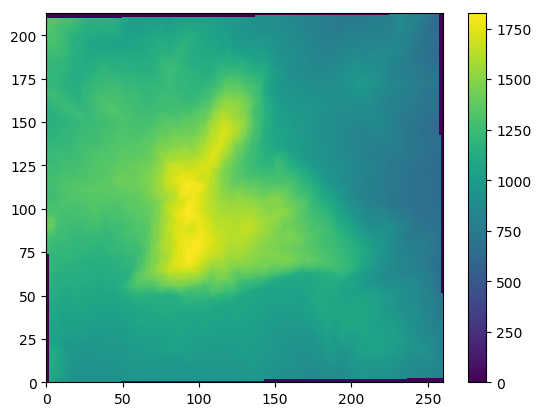

PyObject <matplotlib.colorbar.Colorbar object at 0x7f5619989f98>

In [75]:
pcolormesh(data)
colorbar()

Unfortunately the map does not present the correct orientation. We have to rotate it 90° clockwise in order to obtain a correct orientation.

In [76]:
rotated = data'[end:-1:1, :]

260×213 Array{Float32,2}:
    0.0     0.0     0.0   795.0  …     0.0     0.0    0.0    0.0    0.0
    0.0     0.0     0.0   802.0        0.0     0.0    0.0    0.0    0.0
    0.0     0.0     0.0   810.0      638.0   639.0  638.0  641.0  647.0
    0.0     0.0     0.0   819.0      645.0   647.0  649.0  655.0  661.0
    0.0     0.0     0.0   825.0      653.0   655.0  649.0  655.0  661.0
    0.0     0.0     0.0   825.0  …   654.0   655.0  659.0  666.0  673.0
    0.0     0.0     0.0   826.0      664.0   669.0  674.0  679.0  684.0
    0.0     0.0     0.0   830.0      678.0   680.0  683.0  687.0  695.0
    0.0     0.0     0.0   834.0      687.0   693.0  697.0  706.0  715.0
    0.0     0.0     0.0   834.0      697.0   704.0  711.0  723.0  733.0
    0.0     0.0     0.0   835.0  …   714.0   717.0  727.0  740.0  745.0
    0.0     0.0     0.0   840.0      733.0   743.0  747.0  753.0  763.0
    0.0     0.0     0.0   846.0      750.0   760.0  767.0  775.0  780.0
    ⋮                            ⋱    

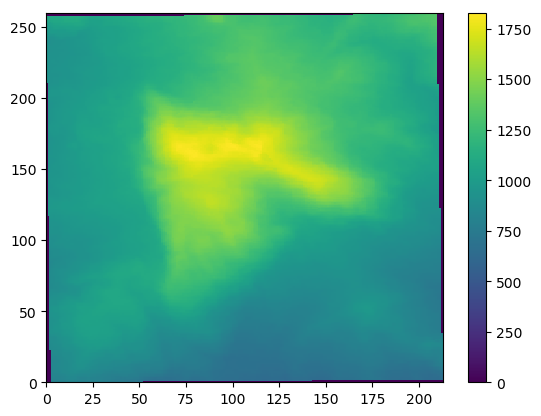

PyObject <matplotlib.colorbar.Colorbar object at 0x7f56199453c8>

In [77]:
pcolormesh(rotated)
colorbar()